In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tools import *
import geopandas as gpd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)
with warnings.catch_warnings():
	warnings.simplefilter("ignore")

# 1 Global Analysis 
## 1. Creation of a global dataframe

In [3]:
df_full = generate_global_df()
display(df_full.shape)
display(df_full.head(2))


(155019, 91)

Name      City      Country     Region  \
0  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   
1  AC Hotel by Marriott San Juan Condado  San Juan  Puerto Rico  Caribbean   

  Continent           Location  Score  NbReviews  Distance from center  Stars  \
0   America  Condado, San Juan    8.2     1398.0                   5.3      4   
1   America  Condado, San Juan    8.2     1398.0                   5.3      4   

                                            Url link  Staff_rating  \
0  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   
1  https://www.booking.com/hotel/pr/ac-hotel-marr...           8.7   

   Facilities_rating  Cleanliness_rating  Comfort_rating  \
0                8.5                 8.7             8.7   
1                8.5                 8.7             8.7   

   Value_for_money_rating  Location_rating                         Room Type  \
0                     7.8              8.9  King Executive Room with Balcony   
1                     7.8              8.9  King Executive Room with Balcony   

   Guests nb  Price  Breakfast  Cancellation  Region Number  Continent Number  \
0        2.0  342.0       23.0           1.0             29                19   
1        2.0  379.0        0.0           1.0             29                19   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                                NaN           
1                                                NaN           

   Price per Square Meter to Buy Apartment in City Centre  \
0                                                NaN        
1                                                NaN        

   International Primary School, Yearly for 1 Child  \
0                                           10508.4   
1                                           10508.4   

   Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child  \
0                                             442.32                     
1                                             442.32                     

   1 Pair of Jeans (Levis 501 Or Similar)  \
0                                   44.57   
1                                   44.57   

   1 Pair of Men Leather Business Shoes  \
0                                101.06   
1                                101.06   

   1 Pair of Nike Running Shoes (Mid-Range)  \
0                                     80.81   
1                                     80.81   

   1 Summer Dress in a Chain Store (Zara, H&M, ...)  Apples (1kg)  \
0                                             42.22          5.28   
1                                             42.22          5.28   

   Banana (1kg)  Beef Round (1kg) (or Equivalent Back Leg Red Meat)  \
0          2.26                                              12.57    
1          2.26                                              12.57    

   Bottle of Wine (Mid-Range)  Chicken Fillets (1kg)  \
0                       16.89                   8.19   
1                       16.89                   8.19   

   Cigarettes 20 Pack (Marlboro)  Domestic Beer (0.5 liter bottle)  \
0                           9.92                              2.05   
1                           9.92                              2.05   

   Eggs (regular) (12)  Imported Beer (0.33 liter bottle)_x  Lettuce (1 head)  \
0                 5.18                                  2.6              2.34   
1                 5.18                                  2.6              2.34   

   Loaf of Fresh White Bread (500g)  Local Cheese (1kg)  \
0                              3.34                7.93   
1                              3.34                7.93   

   Milk (regular), (1 liter)  Onion (1kg)  Oranges (1kg)  Potato (1kg)  \
0                       1.97         2.68            NaN          4.01   
1                       1.97         2.68            NaN          4.01   

   Rice (white), (1kg)  Tomato (1kg)  Water (1.5 liter bott

In [4]:
df_hotel_rooms = df_full[['Url link'] +list(set(columns_room) - set(columns_hotel))]
display(df_hotel_rooms.shape)
df_hotel_rooms.head(2)

(155019, 6)

Url link  Breakfast  Cancellation  \
0  https://www.booking.com/hotel/pr/ac-hotel-marr...       23.0           1.0   
1  https://www.booking.com/hotel/pr/ac-hotel-marr...        0.0           1.0   

   Guests nb  Price                         Room Type  
0        2.0  342.0  King Executive Room with Balcony  
1        2.0  379.0  King Executive Room with Balcony

In [5]:
df_hotels = df_full.groupby(['Url link', 'Location']).first().reset_index()[['City']+list(set(columns_hotel)-set(columns_city))]
df_hotels.insert(0, 'Distance from center', df_hotels.pop('Distance from center'))
df_hotels.insert(0, 'Score', df_hotels.pop('Score'))
df_hotels.insert(0, 'Stars', df_hotels.pop('Stars'))
df_hotels.insert(0, 'Location', df_hotels.pop('Location'))
df_hotels.insert(0, 'Name', df_hotels.pop('Name'))
df_hotels.head(2)

Name Location  Stars  Score  \
0  Ajman Saray, a Luxury Collection Resort, Ajman    Ajman      5    8.7   
1        Al Badayer Retreat by Sharjah Collection  Sharjah      5    9.1   

   Distance from center     City  \
0                   3.0    Ajman   
1                   0.1  Sharjah   

                                            Url link  Cleanliness_rating  \
0  https://www.booking.com/hotel/ae/ajman-saray-a...                 9.0   
1  https://www.booking.com/hotel/ae/al-badayer-re...                 9.4   

   Value_for_money_rating  Facilities_rating  Staff_rating  Location_rating  \
0                     8.1                8.9           9.0              8.9   
1                     8.7                9.1           9.7              9.0   

   NbReviews  Comfort_rating  
0     1441.0             9.1  
1     1606.0             9.4

In [6]:
df_cities = df_full.groupby('City').first().reset_index()[['Country']+list(set(columns_city)-set(columns_country))]
df_cities.insert(0, 'Country', df_cities.pop('Country'))
df_cities.insert(0, 'City', df_cities.pop('City'))
display(df_cities.head(2))

City  Country  One-way Ticket (Local Transport)  \
0  Aachen  Germany                              3.00   
1  Aarhus  Denmark                              2.94   

   McMeal at McDonalds (or Equivalent Combo Meal)  \
0                                           10.00   
1                                           12.38   

   Mobile Phone Monthly Plan with Calls and 10GB+ Data  \
0                                              12.40     
1                                              17.18     

   1 Pair of Jeans (Levis 501 Or Similar)  Tomato (1kg)  \
0                                   89.43           3.0   
1                                   97.03           5.0   

   Tennis Court Rent (1 Hour on Weekend)  Water (1.5 liter bottle)  \
0                                   14.5                      0.77   
1                                    NaN                      0.84   

   1 Summer Dress in a Chain Store (Zara, H&M, ...)  Rice (white), (1kg)  \
0                                             39.16                 2.79   
1                                             38.31                 2.20   

   Local Cheese (1kg)  Gasoline (1 liter)  \
0               12.27                1.76   
1               11.06                1.89   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                                NaN                
1                                           42605.95                

   Chicken Fillets (1kg)  Domestic Beer (0.5 liter draught)  \
0                  14.96                               4.20   
1                  10.32                               6.69   

   Domestic Beer (0.5 liter bottle)  \
0                              0.84   
1                              1.56   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                              65.00       
1                                             102.39       

   Water (0.33 liter bottle)  Taxi Start (Normal Tariff)  \
0                       2.26                         NaN   
1                       3.03                        6.69   

   1 Pair of Men Leather Business Shoes  Monthly Pass (Regular Price)  \
0                                117.50                           NaN   
1                                155.03                         56.21   

   Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)  \
0                                              46.50        
1                                              33.89        

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                                NaN             
1                                                NaN             

   Taxi 1hour Waiting (Normal Tariff)  Potato (1kg)  \
0                                 NaN          1.41   
1                                 NaN          1.83   

   Beef Round (1kg) (or Equivalent Back Leg Red Meat)  Onion (1kg)  \
0                                              16.73          1.61   
1                                              19.39          1.49   

   International Primary School, Yearly for 1 Child  \
0                                               NaN   
1                                               NaN   

   Fitness Club, Monthly Fee for 1 Adult  Meal, Inexpensive Restaurant  \
0                                  28.00                         11.85   
1                                  36.48                         20.08   

   Apartment (1 bedroom) Outside of Centre  Lettuce (1 head)  \
0                                   508.75              1.89   
1                                   790.78              2.09   

   Cigarettes 20 Pack (Marlboro)  Apples (1kg)  \
0                            8.2          2.62   
1                            8.7          2.56   

   Apartment (3 bedrooms) in City Centre  Loaf of Fresh White Bread (500g)  \
0                                1400.00                              1.92   


In [7]:
df_countries = df_full.groupby('Country').first().reset_index()[columns_country]
display(df_countries.head(2))

Country           Region Continent  Population  Yearly Change  net_change  \
0  Albania  Southern Europe    Europe   2832439.0          -0.35     -9882.0   
1  Algeria  Northern Africa    Africa  45606480.0           1.57    703255.0   

  density  land_area  migrants  fert_rate  med_age  urban_pop  world_share  \
0     103    27400.0   -8000.0        1.4     38.0       67.0         0.04   
1      19  2381740.0   -9999.0        2.8     28.0       75.0         0.57   

   Tourism  Tourism_year  
0  2658000          2020  
1   591000          2020

Showing the none/null values and removing them.

In [8]:
print("Hotel rooms that are duplicated: ",df_full.duplicated().sum())
print("Hotel rooms that contains null: ",df_full.isnull().sum().sum())
print("\n")
print("Hotels that are duplicated: ",df_hotels.duplicated().sum())
print("Hotels that contains null: ",df_hotels.isnull().sum().sum())
print("\n")
print("Cities that are duplicated: ",df_cities.duplicated().sum())
print("Cities that contains null: ",df_cities.isnull().sum().sum())
print("\n")
print("Countries that are duplicated: ",df_countries.duplicated().sum())
print("Countries that contains null: ",df_countries.isnull().sum().sum())

Hotel rooms that are duplicated:  0
Hotel rooms that contains null:  1063848


Hotels that are duplicated:  0
Hotels that contains null:  0


Cities that are duplicated:  0
Cities that contains null:  2385


Countries that are duplicated:  0
Countries that contains null:  7


Example on how to merge

In [9]:
df_cities_countries = pd.merge(df_countries,df_cities, on='Country', how='inner')
df_cities_countries.insert(0, 'Country', df_cities_countries.pop('Country'))
df_cities_countries.insert(0, 'City', df_cities_countries.pop('City'))
display(df_cities_countries.shape,df_cities_countries.head(1))

(360, 71)

City  Country           Region Continent  Population  Yearly Change  \
0  Tirana  Albania  Southern Europe    Europe   2832439.0          -0.35   

   net_change density  land_area  migrants  fert_rate  med_age  urban_pop  \
0     -9882.0     103    27400.0   -8000.0        1.4     38.0       67.0   

   world_share  Tourism  Tourism_year  One-way Ticket (Local Transport)  \
0         0.04  2658000          2020                               0.4   

   McMeal at McDonalds (or Equivalent Combo Meal)  \
0                                            7.42   

   Mobile Phone Monthly Plan with Calls and 10GB+ Data  \
0                                              14.74     

   1 Pair of Jeans (Levis 501 Or Similar)  Tomato (1kg)  \
0                                   59.66          1.66   

   Tennis Court Rent (1 Hour on Weekend)  Water (1.5 liter bottle)  \
0                                  21.06                       0.6   

   1 Summer Dress in a Chain Store (Zara, H&M, ...)  Rice (white), (1kg)  \
0                                             45.12                 1.99   

   Local Cheese (1kg)  Gasoline (1 liter)  \
0               11.23                1.89   

   Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car)  \
0                                           23955.17                

   Chicken Fillets (1kg)  Domestic Beer (0.5 liter draught)  \
0                   7.46                               2.47   

   Domestic Beer (0.5 liter bottle)  \
0                              1.25   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                              49.46       

   Water (0.33 liter bottle)  Taxi Start (Normal Tariff)  \
0                       0.75                        2.97   

   1 Pair of Men Leather Business Shoes  Monthly Pass (Regular Price)  \
0                                117.29                         15.83   

   Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)  \
0                                              16.12        

   Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car)  \
0                                           23245.74             

   Taxi 1hour Waiting (Normal Tariff)  Potato (1kg)  \
0                               12.86           1.0   

   Beef Round (1kg) (or Equivalent Back Leg Red Meat)  Onion (1kg)  \
0                                              13.05          1.11   

   International Primary School, Yearly for 1 Child  \
0                                           4470.01   

   Fitness Club, Monthly Fee for 1 Adult  Meal, Inexpensive Restaurant  \
0                                  41.47                          9.89   

   Apartment (1 bedroom) Outside of Centre  Lettuce (1 head)  \
0                                   345.18              1.02   

   Cigarettes 20 Pack (Marlboro)  Apples (1kg)  \
0                           3.46          1.36   

   Apartment (3 bedrooms) in City Centre  Loaf of Fresh White Bread (500g)  \
0                                 981.27                              0.88   

   Cappuccino (regular)  Cinema, International Release, 1 Seat  \
0                  1.68                                   7.91   

   Bottle of Wine (Mid-Range)  \
0                        9.89   

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                            1335.03           

   Taxi 1km (Normal Tariff)  Apartment (3 bedrooms) Outside of Centre  \
0                      2.97                                    606.31   

   Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate  \
0                                               5.83                            

   Coke/Pepsi (0.33 liter bottle)  \
0                            1.48   

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            2564.54        

   Eggs (regular) (12)  Apartment (1 bedroom) in City Centre  \
0                 3.33      

## 2. Distribution visualizations

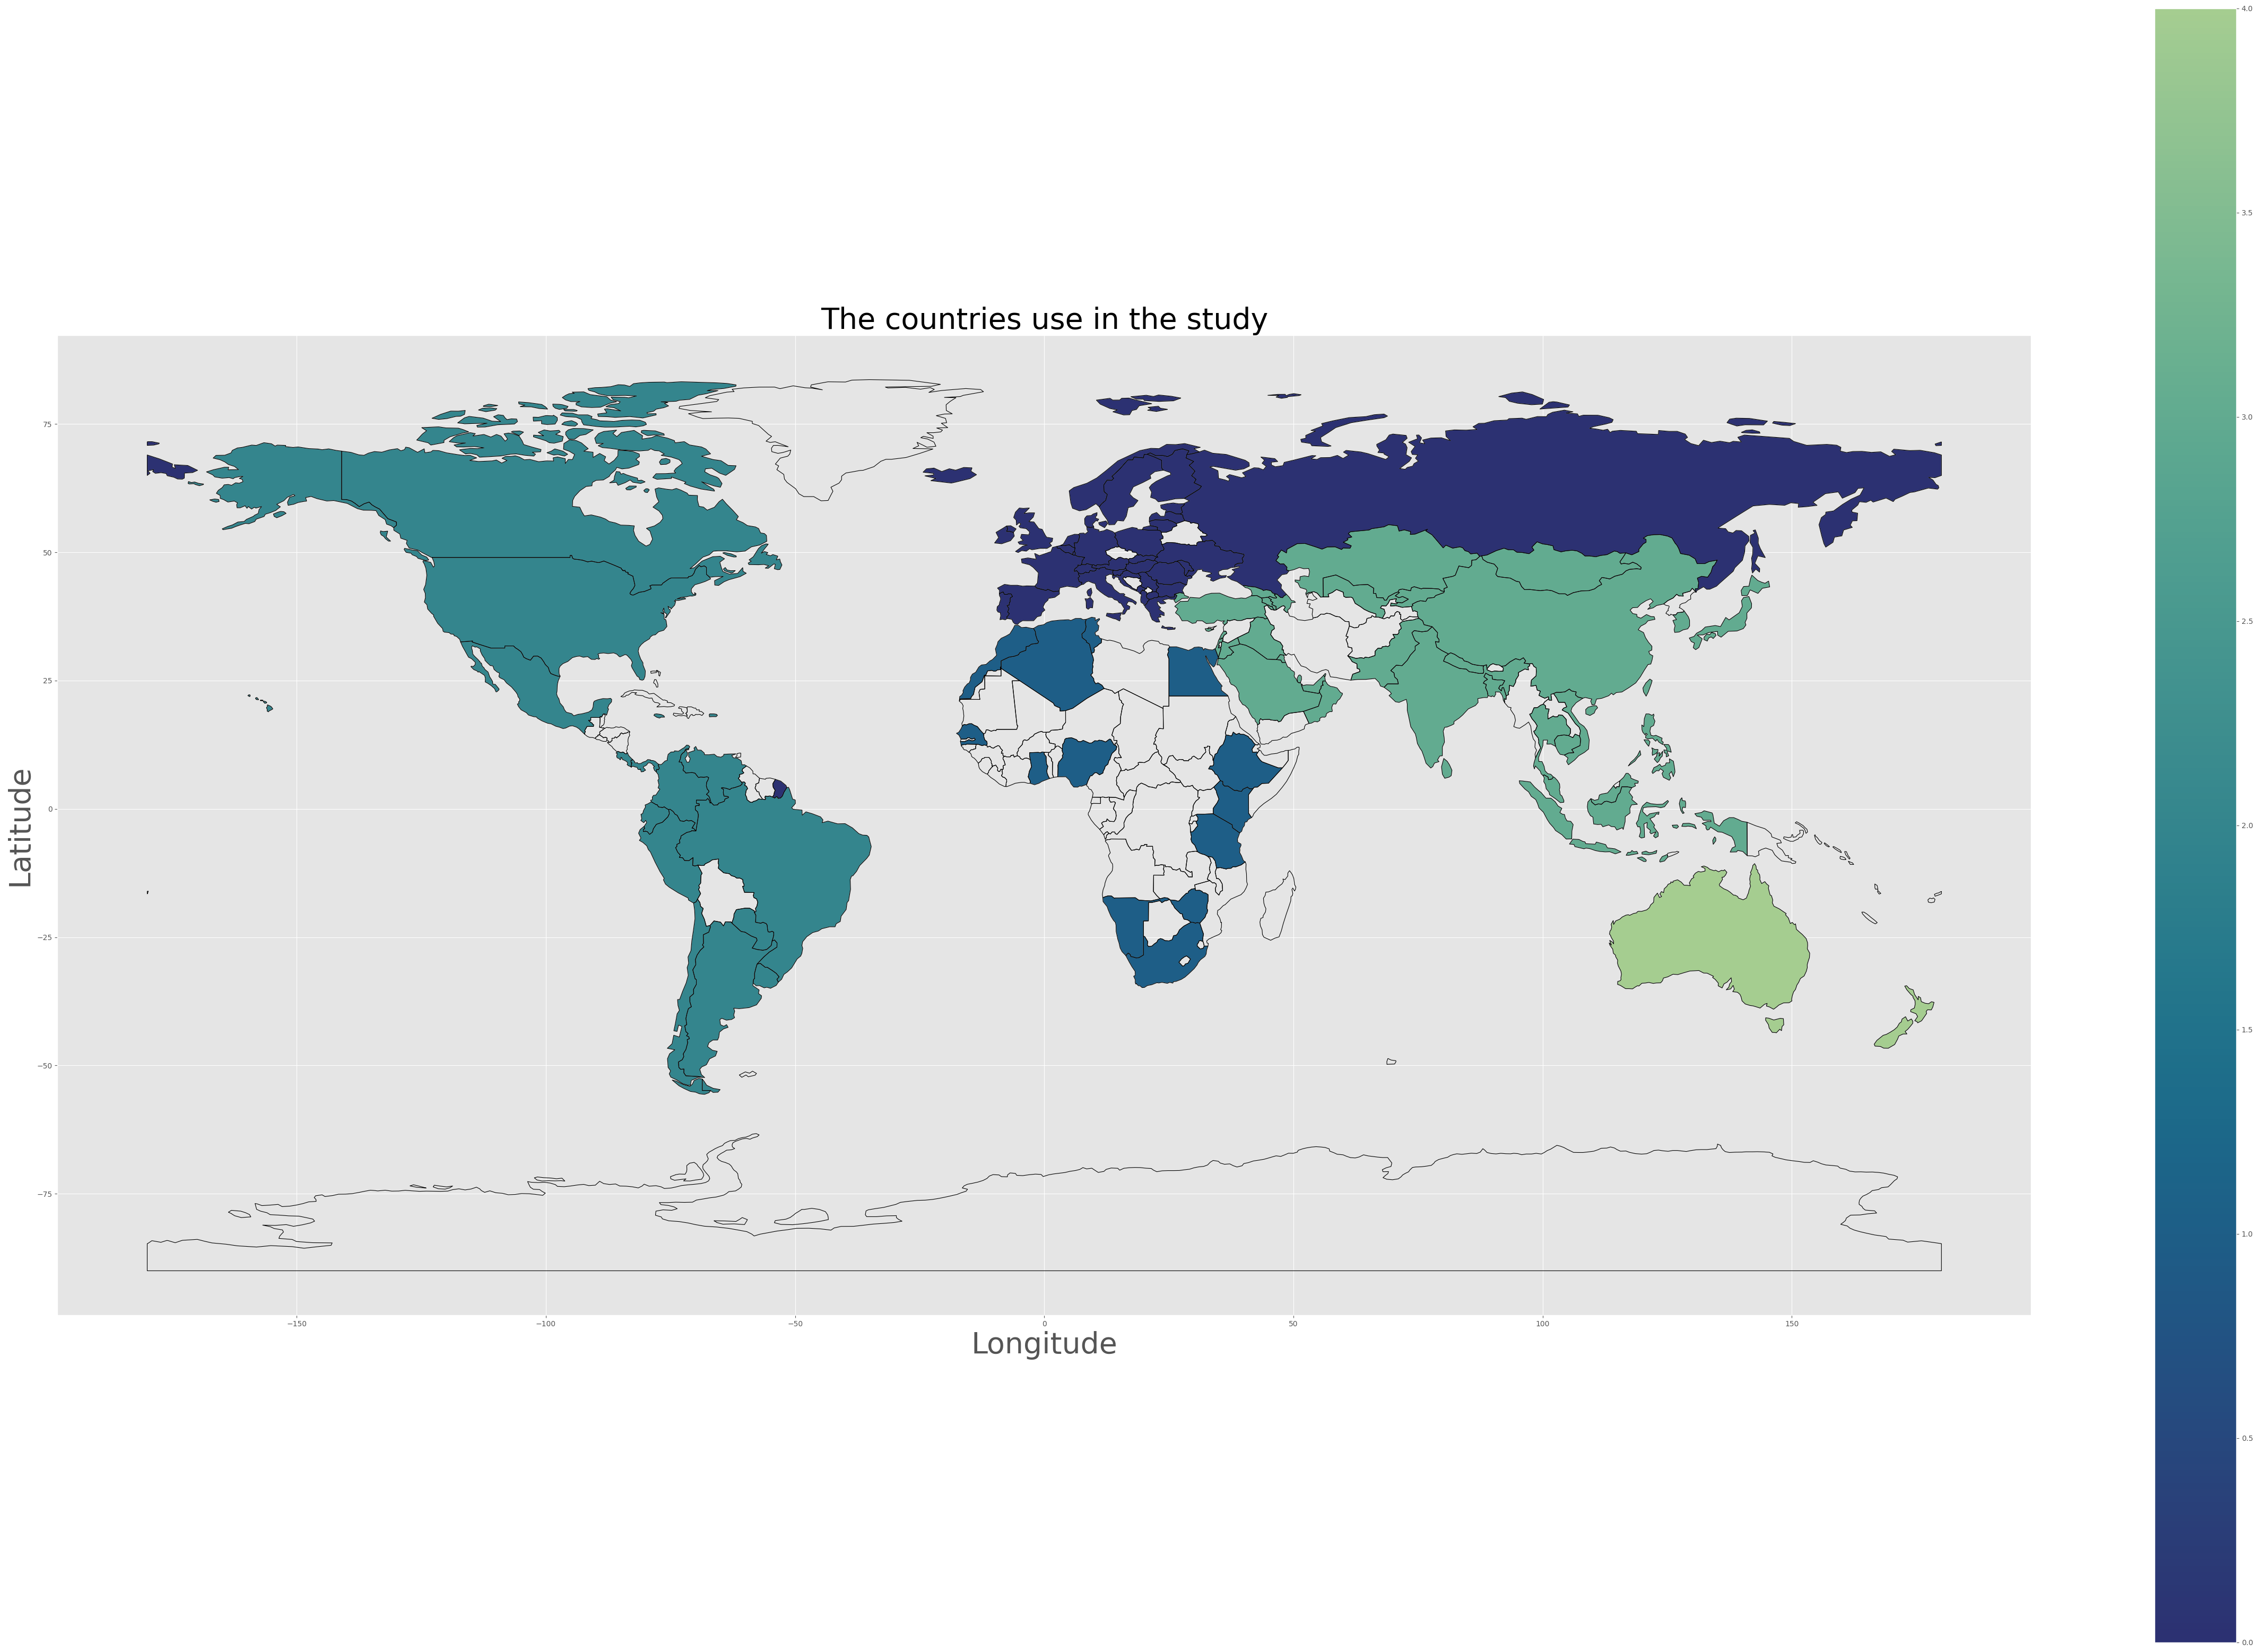

In [10]:
df_countries.insert(1, 'Population', df_countries.pop('Population'))
df_countries.insert(2, 'Yearly Change', df_countries.pop('Yearly Change'))
continents = df_countries['Continent'].unique()
df_countries['Continent_n'] = df_countries['Continent'].apply(lambda x: np.where(continents==x)[0][0])
plot_country_bubbles(df_countries, v_name_color='Continent_n', title='The countries use in the study', cmap_color='crest_r')
df_countries.drop(columns=['Continent_n'], inplace=True)

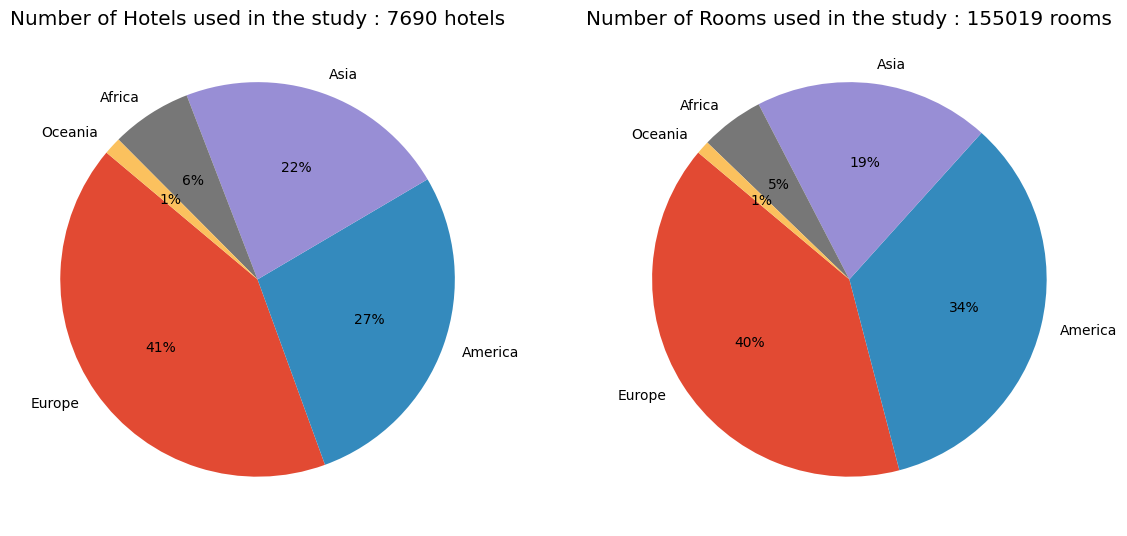

In [11]:
df = pd.merge(df_cities, df_countries, on='Country', how='inner')
df = pd.merge(df, df_hotels, on='City', how='inner')

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Hotel counts
hotel_counts = df['Continent'].value_counts()
total_hotels = hotel_counts.sum()
axs[0].pie(hotel_counts, labels=hotel_counts.index, autopct='%1d%%', startangle=140, textprops={'color':"black"})
axs[0].set_title(f'Number of Hotels used in the study : {total_hotels} hotels', color='black')

# Room counts
df = pd.merge(df, df_hotel_rooms, on='Url link', how='inner')
room_counts = df['Continent'].value_counts()
total_rooms = room_counts.sum()
axs[1].pie(room_counts, labels=room_counts.index, autopct='%1d%%', startangle=140, textprops={'color':"black"})
axs[1].set_title(f'Number of Rooms used in the study : {total_rooms} rooms', color='black')

plt.show()

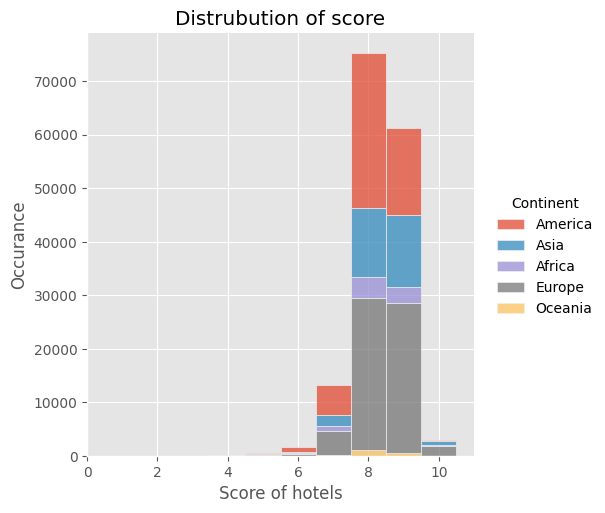

In [12]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.displot(df_full, x="Score", kind="hist", hue="Continent", discrete=True, multiple="stack")
	plt.title("Distrubution of score")
	plt.ylabel("Occurance")
	plt.xlabel("Score of hotels")
	plt.show()

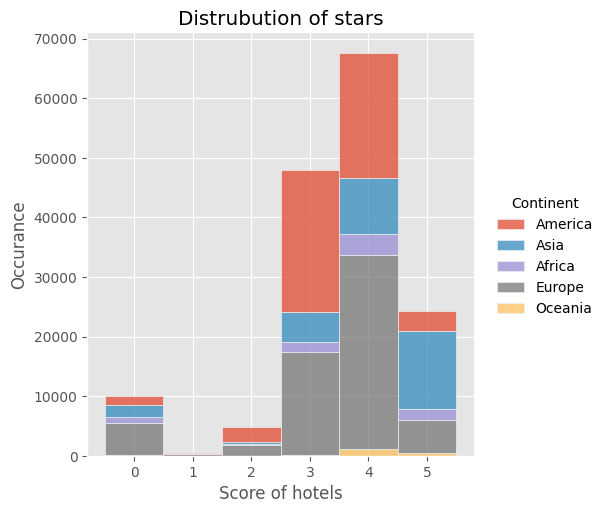

In [13]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.displot(df_full, x="Stars", kind="hist", hue="Continent", discrete=True, multiple="stack")
	plt.title("Distrubution of stars")
	plt.ylabel("Occurance")
	plt.xlabel("Score of hotels")
	plt.show()

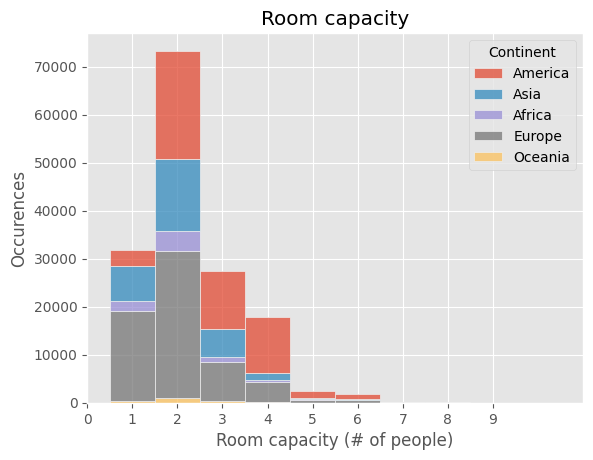

In [14]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.histplot(df_full, x="Guests nb",discrete=True, hue="Continent", multiple="stack")
	plt.title("Room capacity")
	plt.ylabel("Occurences")
	plt.xlabel("Room capacity (# of people)")
	plt.xticks(range(0,10))
	plt.xlim([0,11])
	plt.show()

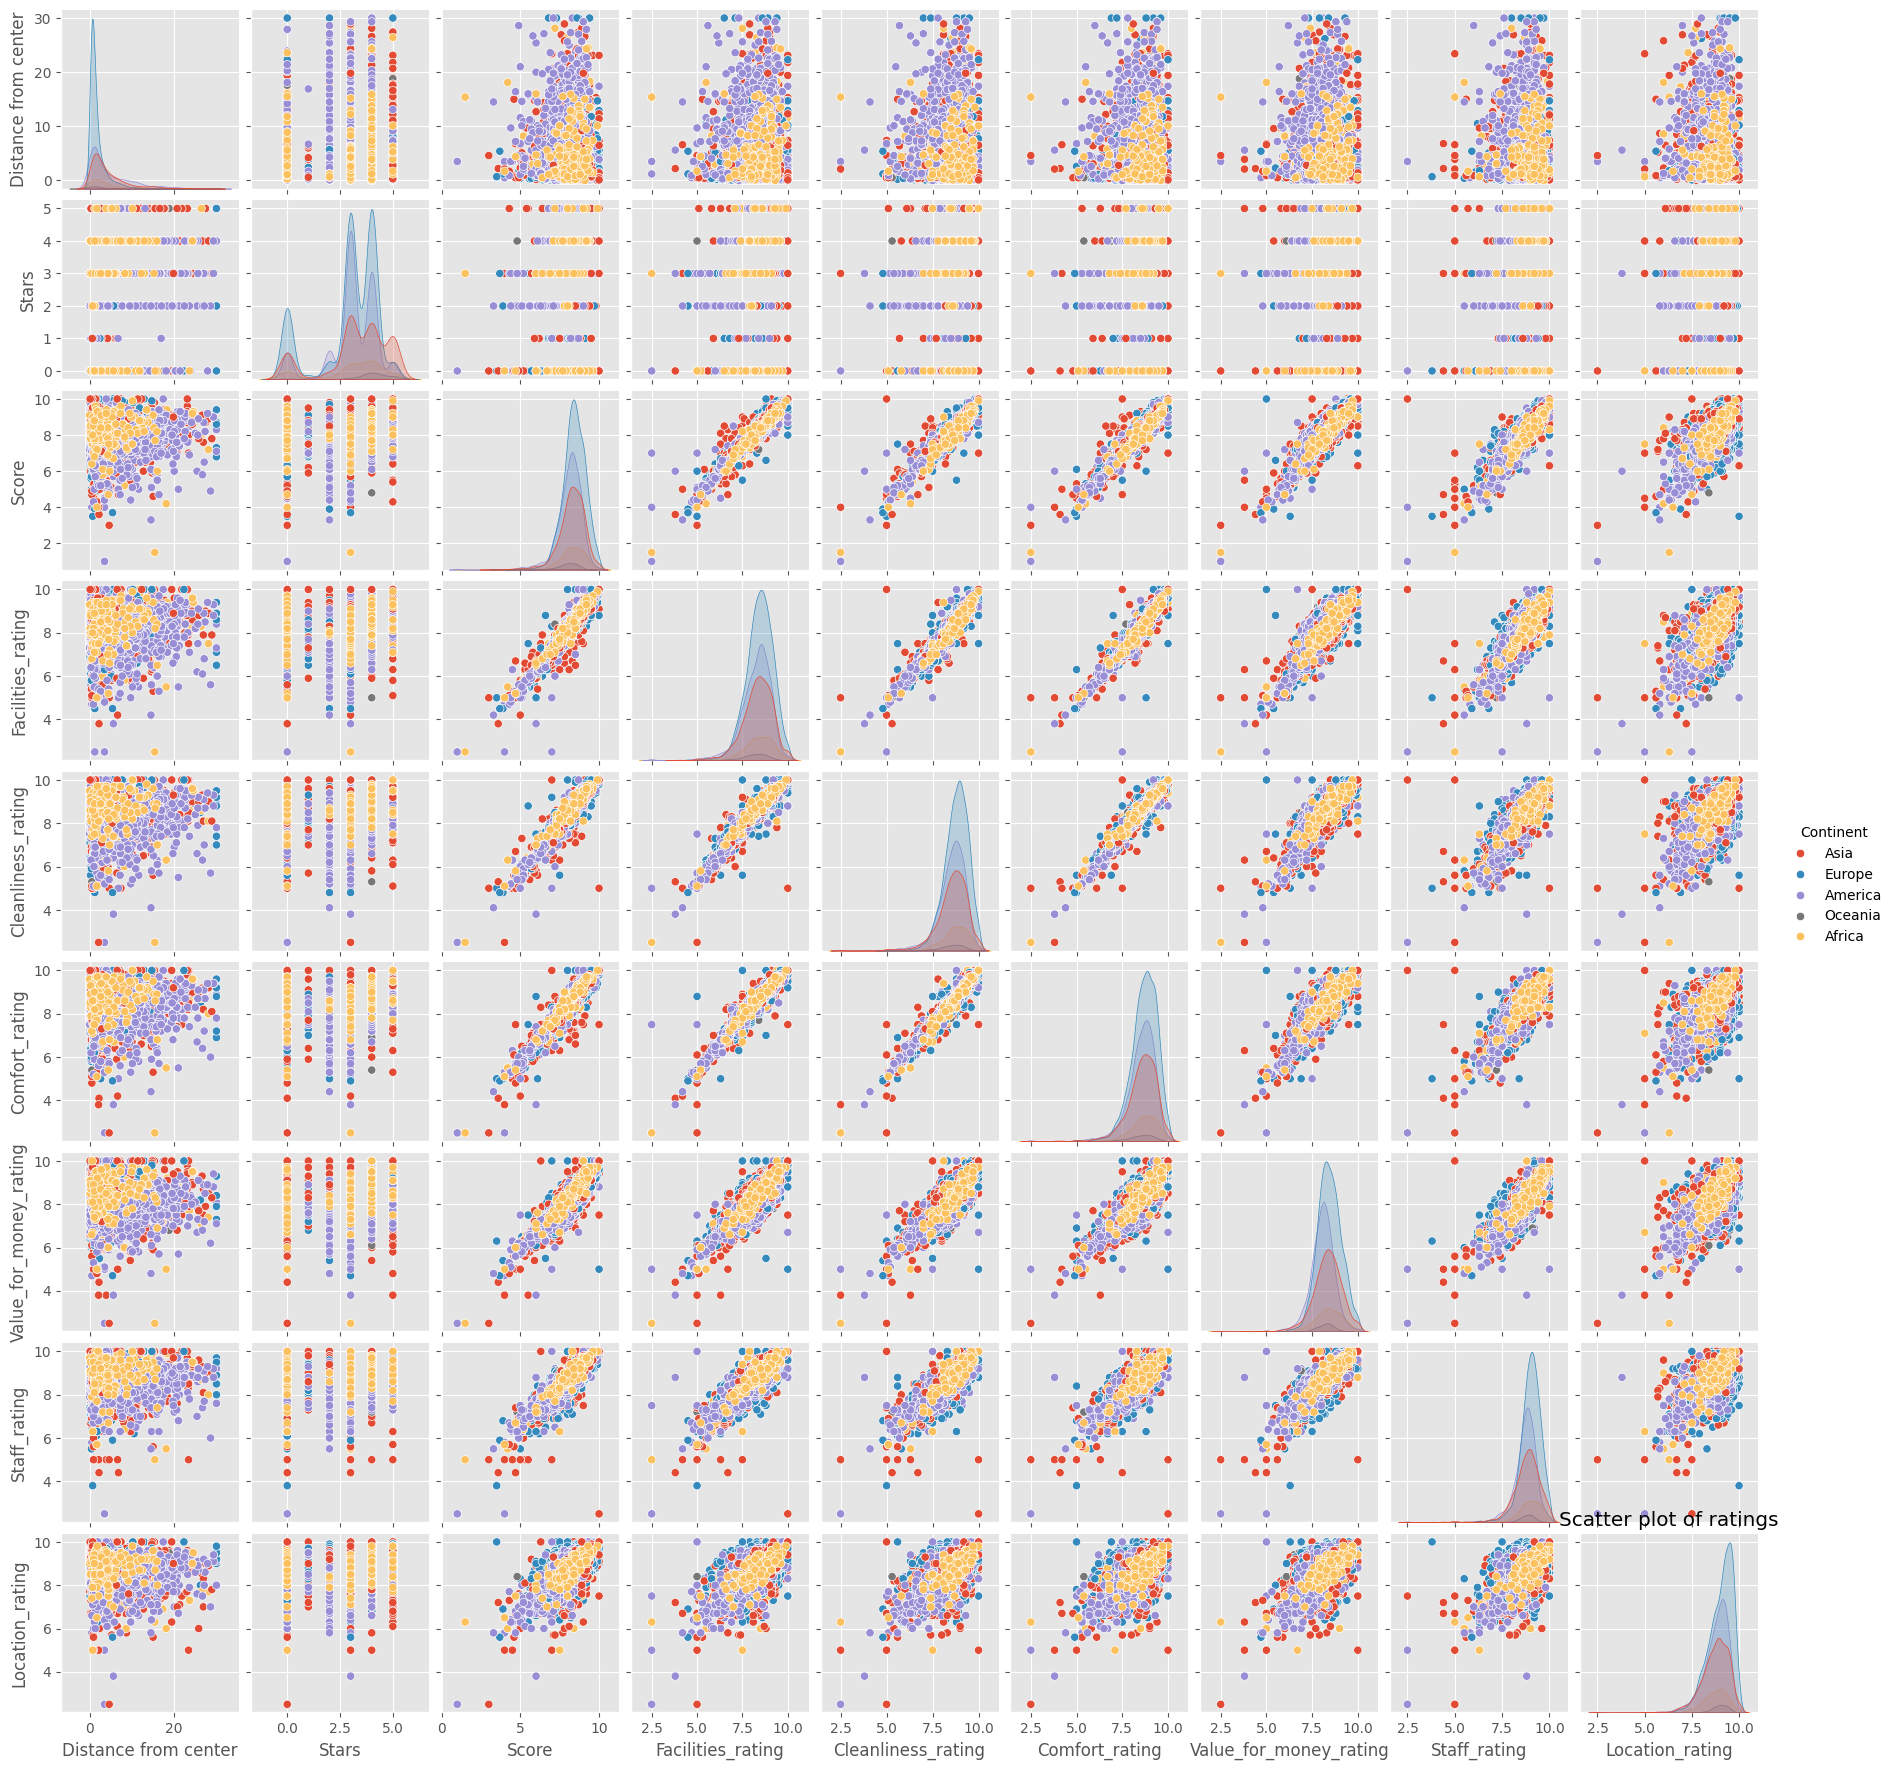

In [15]:
vars=["Distance from center", "Stars", "Score","Facilities_rating","Cleanliness_rating","Comfort_rating","Value_for_money_rating","Staff_rating","Location_rating"]
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.pairplot(df_full.groupby('Url link').first().reset_index(), vars=vars,
              height=2, hue="Continent")
	plt.title('Scatter plot of ratings')
	plt.show()

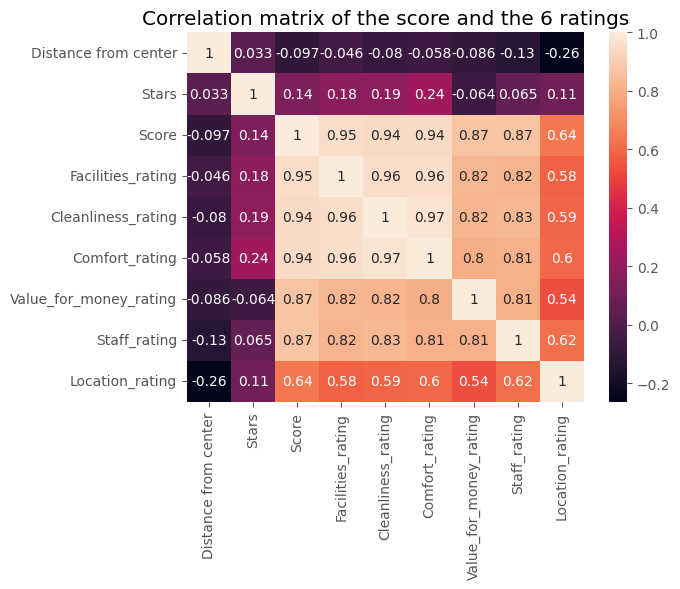

In [16]:
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	sns.heatmap(df_hotels[vars].corr(), annot=True)
	plt.title("Correlation matrix of the score and the 6 ratings")
	plt.show()

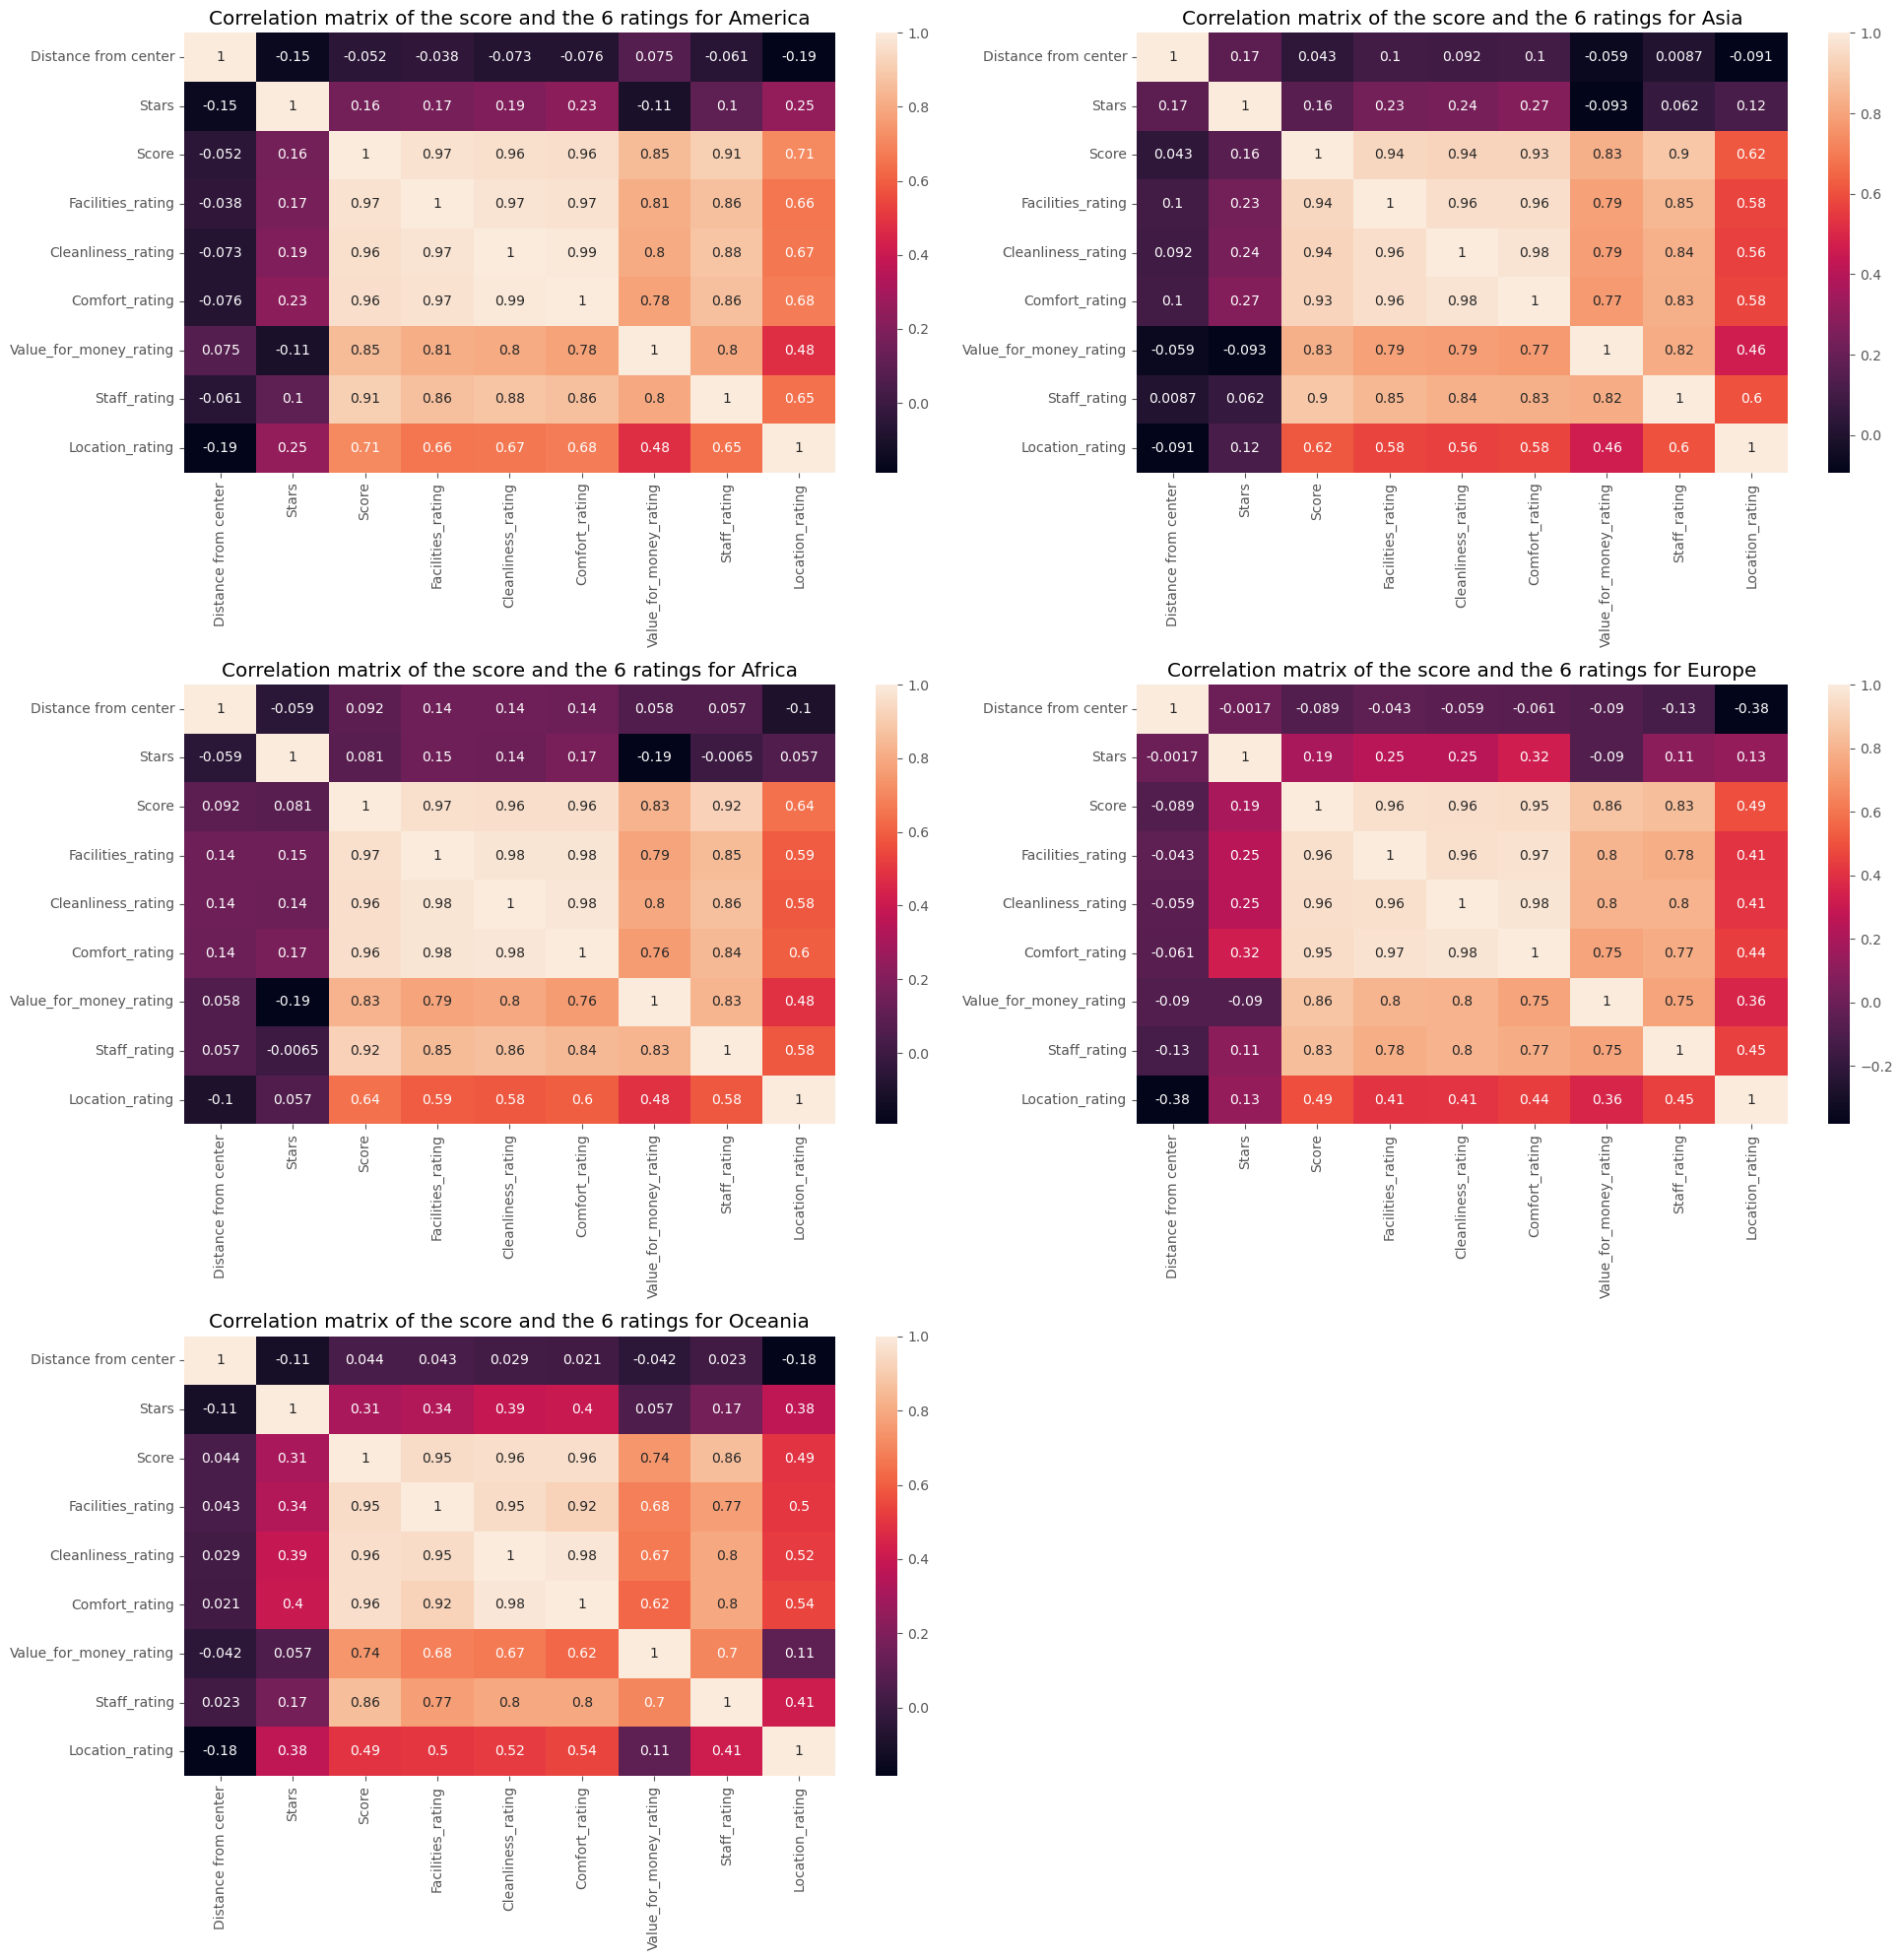

In [18]:
df = df_full.copy()
unique_hues = df['Continent'].unique()
n = len(unique_hues)

# Create a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for ax, hue in zip(axs.flatten(), list(unique_hues) + [None]*(2*3 - n)):
    if hue is not None:
        subset = df[df['Continent'] == hue]
        correlation_matrix = subset[vars].corr()
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            sns.heatmap(correlation_matrix, annot=True, ax=ax)
            ax.set_title(f"Correlation matrix of the score and the 6 ratings for {hue}")
    else:
        fig.delaxes(ax)  # Remove empty subplots

plt.tight_layout()
plt.show()

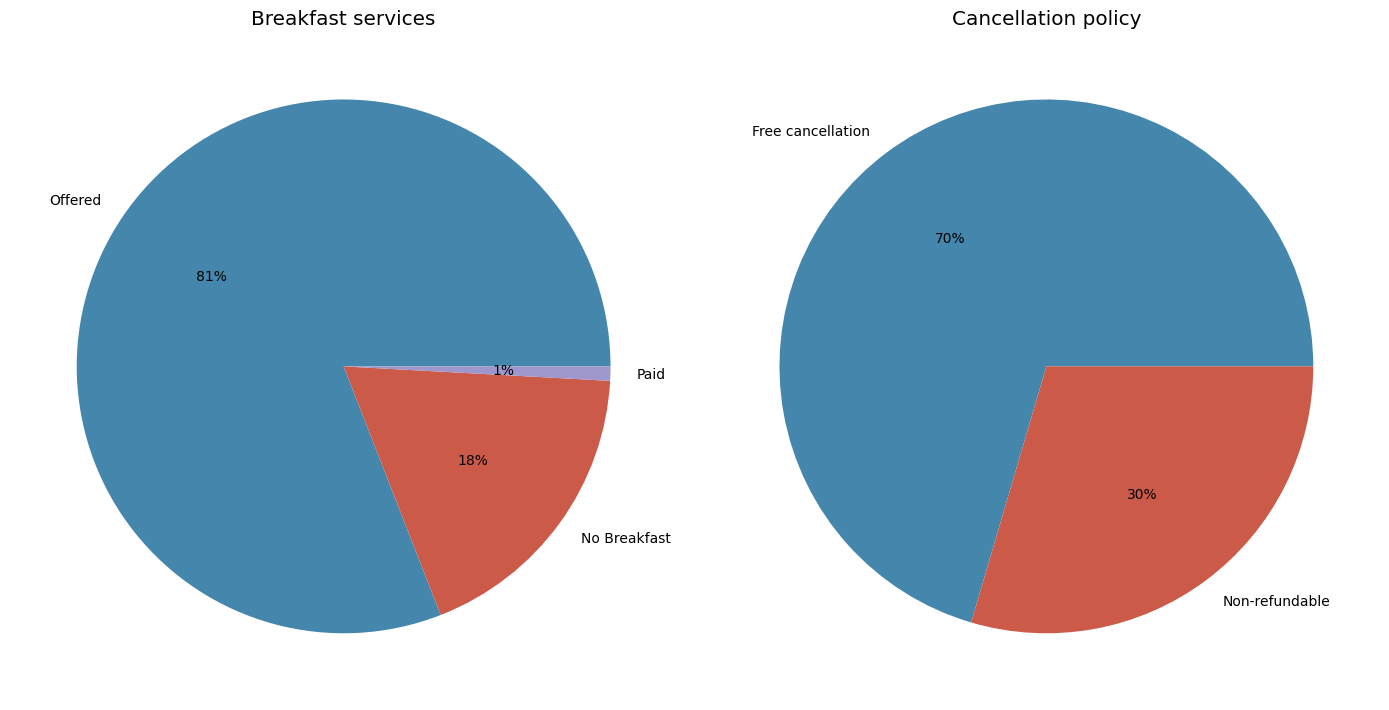

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Breakfast services pie chart
breakfast_counts = df_full['Breakfast'].value_counts()
breakfast_df = pd.DataFrame({
    'Type of Breakfast': ['Offered', 'No Breakfast', 'Paid'],
    'Percentage of Hotels (%)': breakfast_counts[[0, -1, 1]].values
})
axs[0].pie(breakfast_df['Percentage of Hotels (%)'], labels=breakfast_df['Type of Breakfast'], autopct='%.0f%%', colors=['#4586AC', '#CC5A49','#9E97CC']) 
axs[0].set_title("Breakfast services")

# Cancellation policy pie chart
counts = df_full["Cancellation"].value_counts()
counts_df = pd.DataFrame({
    'Cancellation Policy': ['Free cancellation' if index == 1 else 'Non-refundable' for index in counts.index],
    'Count': counts.values
})
axs[1].pie(counts_df['Count'], labels=counts_df['Cancellation Policy'], autopct='%.0f%%', colors=['#4586AC', '#CC5A49']) 
axs[1].set_title("Cancellation policy")

plt.tight_layout()
plt.show()

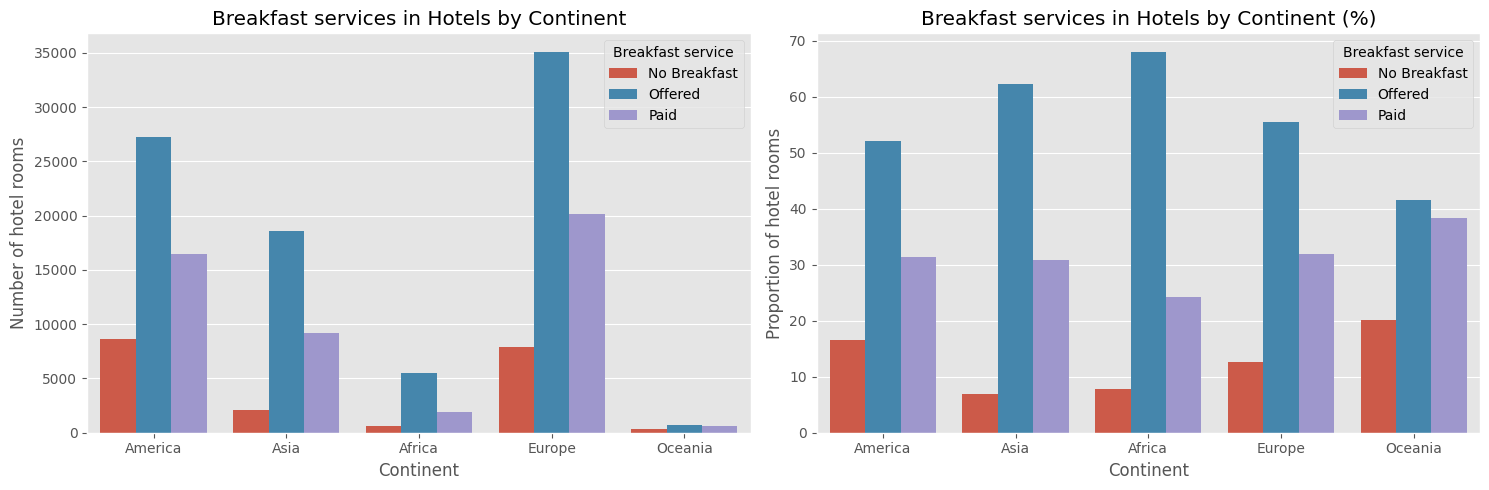

In [18]:
# Create a new DataFrame with one row for each hotel
data = []
for continent in df_full['Continent'].unique():
    free_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] == 0)]
    no_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] == -1)]
    paid_hotels = df_full[(df_full['Continent'] == continent) & (df_full['Breakfast'] > 0)]
    data.extend([(continent, 'No Breakfast') for _ in range(no_hotels.shape[0])])
    data.extend([(continent, 'Offered') for _ in range(free_hotels.shape[0])])
    data.extend([(continent, 'Paid') for _ in range(paid_hotels.shape[0])])

# Original Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df = pd.DataFrame(data, columns=['Continent', 'Breakfast'])
sns.countplot(x='Continent', hue='Breakfast', data=df)
plt.title('Breakfast services in Hotels by Continent')
plt.ylabel('Number of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Breakfast service')

# Normalized Plot
plt.subplot(1, 2, 2)
normalized_data = []
for continent in df_full['Continent'].unique():
    continent_data = df_full[df_full['Continent'] == continent]
    total_hotels = len(continent_data)
    no_breakfast_count = len(continent_data[continent_data['Breakfast'] == -1])
    offered_count = len(continent_data[continent_data['Breakfast'] == 0])
    paid_count = len(continent_data[continent_data['Breakfast'] > 0])
    if total_hotels > 0:
        no_breakfast_proportion = no_breakfast_count / total_hotels
        offered_proportion = offered_count / total_hotels
        paid_proportion = paid_count / total_hotels
        normalized_data.append((continent, 'No Breakfast', no_breakfast_proportion*100))
        normalized_data.append((continent, 'Offered', offered_proportion*100))
        normalized_data.append((continent, 'Paid', paid_proportion*100))

df_normalized = pd.DataFrame(normalized_data, columns=['Continent', 'Breakfast', 'Proportion'])
sns.barplot(x='Continent', y='Proportion', hue='Breakfast', data=df_normalized)
plt.title('Breakfast services in Hotels by Continent (%)')
plt.ylabel('Proportion of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Breakfast service')

plt.tight_layout()
plt.show()


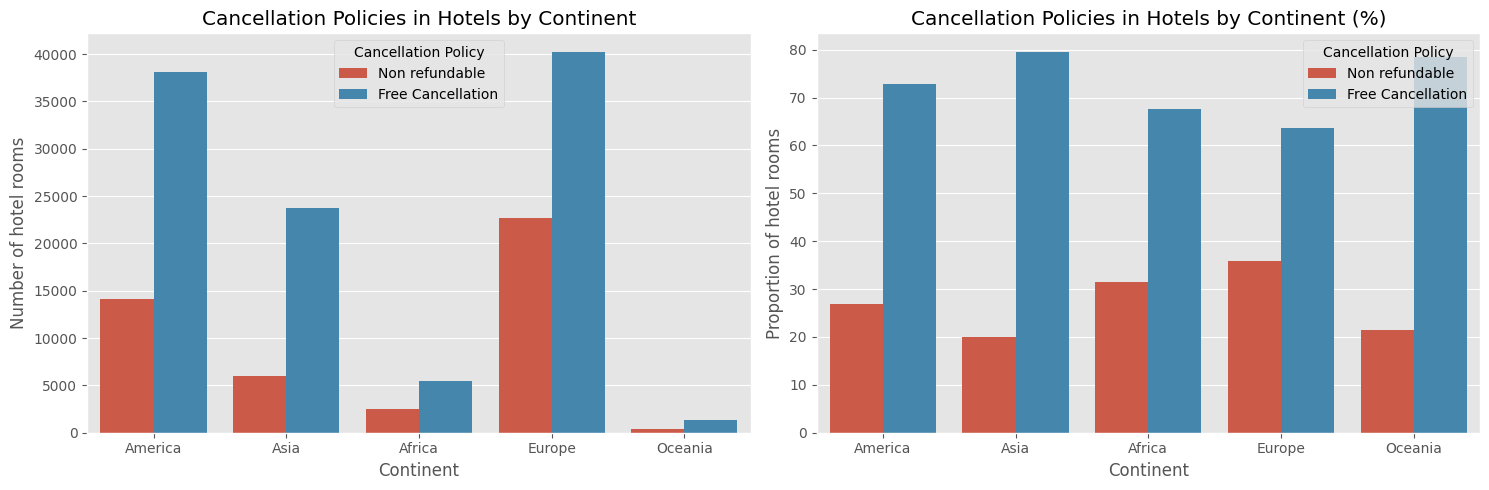

In [19]:
# Create a new DataFrame with one row for each hotel
data = []
for continent in df_full['Continent'].unique():
    free_cancellation = df_full[(df_full['Continent'] == continent) & (df_full['Cancellation'] == 1)]
    no_cancellation = df_full[(df_full['Continent'] == continent) & (df_full['Cancellation'] == 0)]
    data.extend([(continent, 'Non refundable') for _ in range(no_cancellation.shape[0])])
    data.extend([(continent, 'Free Cancellation') for _ in range(free_cancellation.shape[0])])

# Original Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df = pd.DataFrame(data, columns=['Continent', 'Cancellation'])
sns.countplot(x='Continent', hue='Cancellation', data=df)
plt.title('Cancellation Policies in Hotels by Continent')
plt.ylabel('Number of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Cancellation Policy')

# Normalized Plot
plt.subplot(1, 2, 2)
normalized_data = []
for continent in df_full['Continent'].unique():
    continent_data = df_full[df_full['Continent'] == continent]
    total_hotels = len(continent_data)
    free_cancellation_count = len(continent_data[continent_data['Cancellation'] == 1])
    no_cancellation_count = len(continent_data[continent_data['Cancellation'] == 0])
    if total_hotels > 0:
        no_cancellation_proportion = no_cancellation_count / total_hotels
        free_cancellation_proportion = free_cancellation_count / total_hotels
        normalized_data.append((continent, 'Non refundable', no_cancellation_proportion*100))
        normalized_data.append((continent, 'Free Cancellation', free_cancellation_proportion*100))

df_normalized = pd.DataFrame(normalized_data, columns=['Continent', 'Cancellation', 'Proportion'])
sns.barplot(x='Continent', y='Proportion', hue='Cancellation', data=df_normalized)
plt.title('Cancellation Policies in Hotels by Continent (%)')
plt.ylabel('Proportion of hotel rooms')
plt.xlabel('Continent')
plt.legend(title='Cancellation Policy')

plt.tight_layout()
plt.show()

In [20]:
numeric_cols = df_full.select_dtypes(include=[np.number]).columns.tolist()
# include also non numeric cols but encode them
non_numeric_cols = list(set(df_full.columns) - set(numeric_cols))
le = preprocessing.LabelEncoder()
df_full[non_numeric_cols] = df_full[non_numeric_cols].apply(lambda col: le.fit_transform(col))
all_cols = numeric_cols + non_numeric_cols
#remove Url link from all_cols
all_cols = [col for col in all_cols if col not in  ['Url link', 'Name', 'Location']]
# change only_hotel_var_list to include both numeric and non numeric vars
only_hotel_var_list = list(set(all_cols).intersection(set(columns_room)) - set(columns_city))
env_var_list =  list(set(all_cols).intersection(set(columns_city)))
display(only_hotel_var_list,env_var_list)

['Score',
 'Cleanliness_rating',
 'Breakfast',
 'Stars',
 'Value_for_money_rating',
 'NbReviews',
 'Room Type',
 'Cancellation',
 'Guests nb',
 'Distance from center',
 'Facilities_rating',
 'Staff_rating',
 'Location_rating',
 'Price',
 'Comfort_rating']

['One-way Ticket (Local Transport)',
 'Lettuce (1 head)',
 'Cigarettes 20 Pack (Marlboro)',
 'Apples (1kg)',
 'McMeal at McDonalds (or Equivalent Combo Meal)',
 'Mobile Phone Monthly Plan with Calls and 10GB+ Data',
 'City',
 '1 Pair of Jeans (Levis 501 Or Similar)',
 'Tomato (1kg)',
 'Tennis Court Rent (1 Hour on Weekend)',
 'Water (1.5 liter bottle)',
 'Apartment (3 bedrooms) in City Centre',
 'Loaf of Fresh White Bread (500g)',
 'Cappuccino (regular)',
 'Cinema, International Release, 1 Seat',
 'land_area',
 '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
 'Bottle of Wine (Mid-Range)',
 'Rice (white), (1kg)',
 'Price per Square Meter to Buy Apartment Outside of Centre',
 'Region',
 'Local Cheese (1kg)',
 'Population',
 'world_share',
 'Gasoline (1 liter)',
 'med_age',
 'Continent',
 'Yearly Change',
 'Chicken Fillets (1kg)',
 'Apartment (3 bedrooms) Outside of Centre',
 'Domestic Beer (0.5 liter draught)',
 'Taxi 1km (Normal Tariff)',
 'Toyota Corolla Sedan 1.6l 97kW Comfort (Or

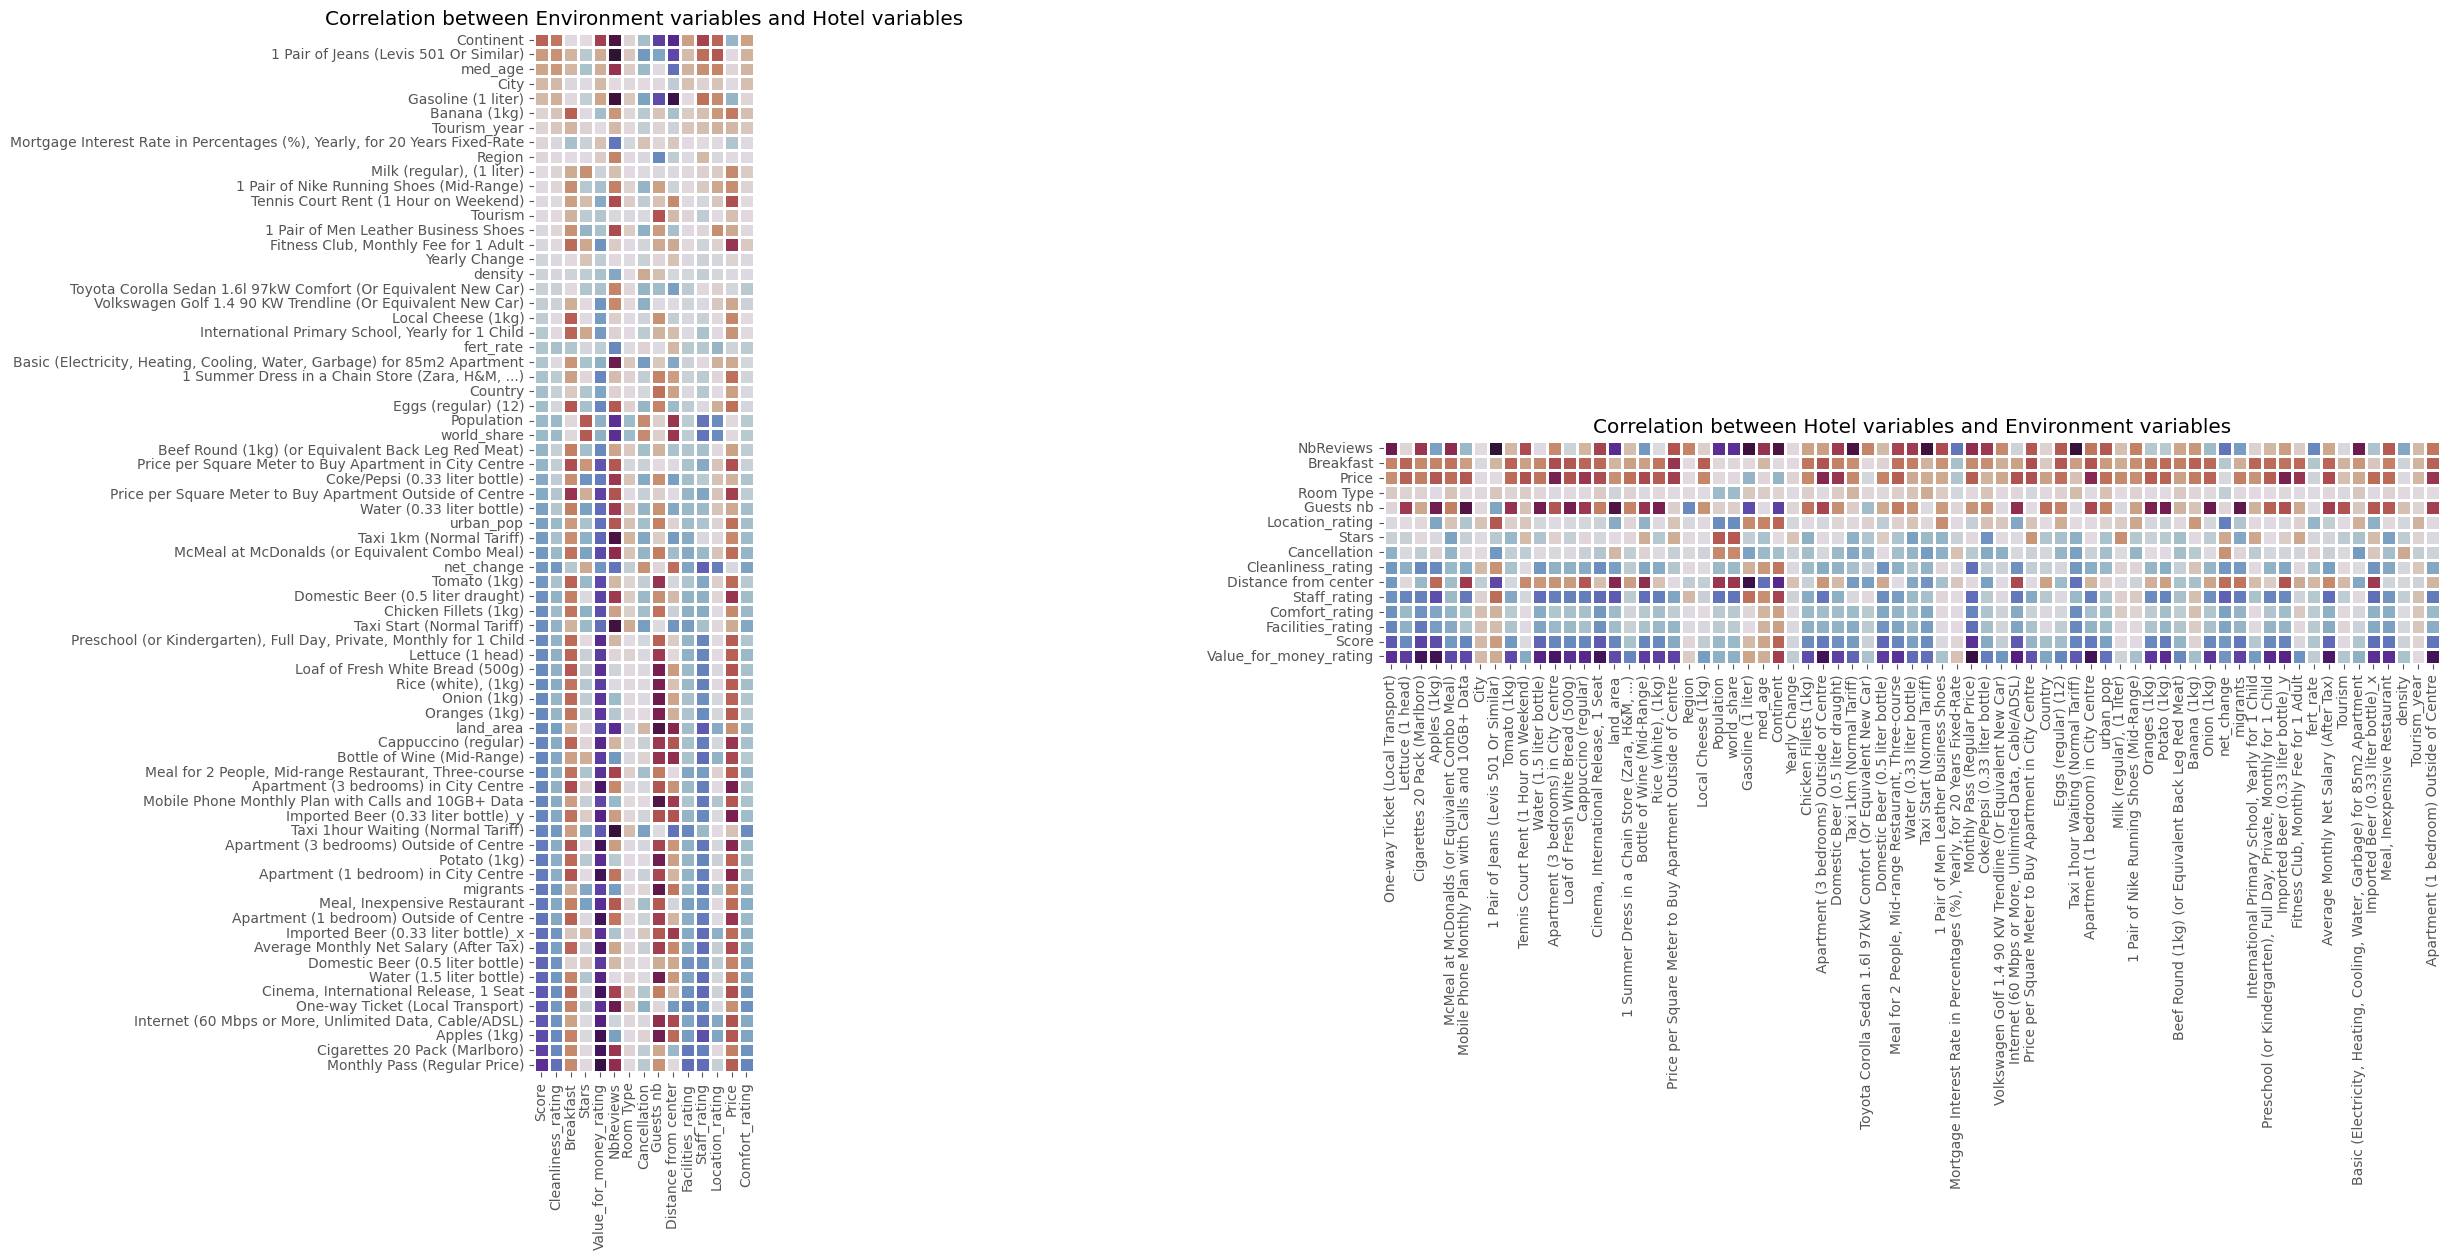

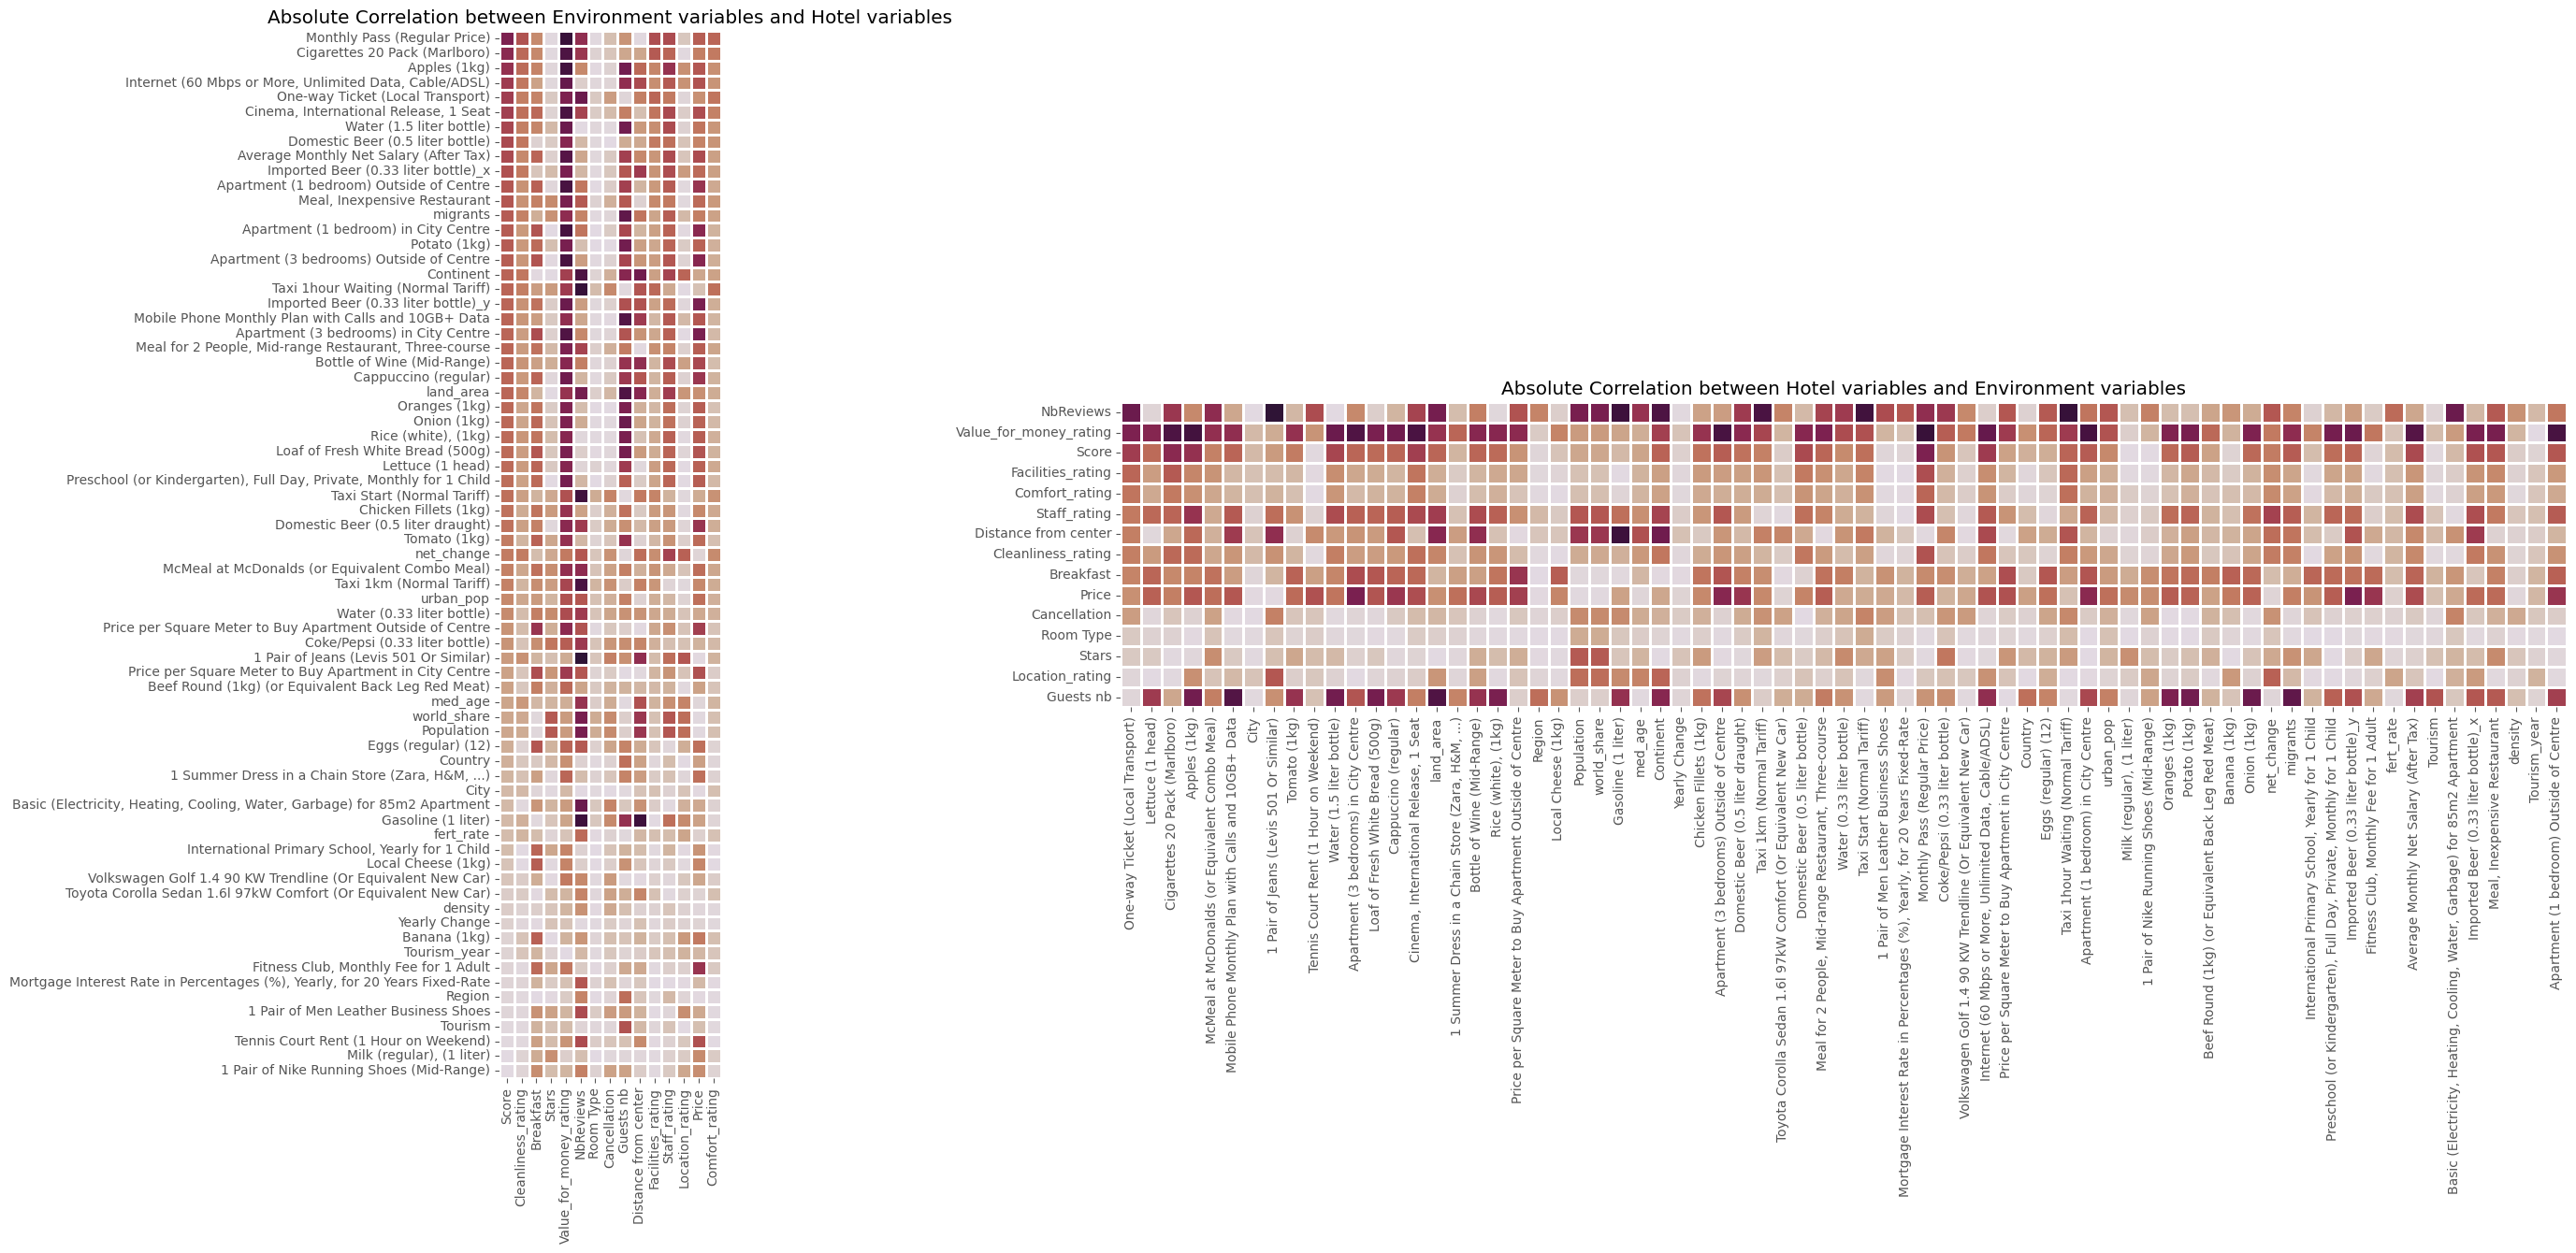

In [23]:
if os.path.exists('data/Hotel_and_Envirment_corr.csv'):
	Hotel_and_Envirment_corr = pd.read_csv('data/Hotel_and_Envirment_corr.csv')
	Hotel_and_Envirment_corr_abs = pd.read_csv('data/Hotel_and_Envirment_corr_abs.csv')
	plot_Evar_Hvar_correlations(env_vars=env_var_list, only_hotel_vars=only_hotel_var_list, df=df_full, show_both=True)
else:
	Hotel_and_Envirment_corr, Hotel_and_Envirment_corr_abs= plot_Evar_Hvar_correlations(env_vars=env_var_list, only_hotel_vars=only_hotel_var_list, df=df_full, show_both=True)
	Hotel_and_Envirment_corr.to_csv('data/Hotel_and_Envirment_corr.csv', index=False)
	Hotel_and_Envirment_corr_abs.to_csv('data/Hotel_and_Envirment_corr_abs.csv', index=False)

In [25]:
Hotel_and_Envirment_corr = Hotel_and_Envirment_corr.iloc[:, :-1]
corr_pairs = Hotel_and_Envirment_corr.unstack().sort_values(ascending=False).to_frame().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.iloc[::2]
corr_pairs = corr_pairs.sort_values(by='Abs Correlation', ascending=False)
print("The most correlated pairs of variables by abs value of the correlation:")
display(corr_pairs.groupby('Variable 1')['Abs Correlation'].sum().sort_values(ascending=False).reset_index())
display(corr_pairs.head(30).reset_index(drop=True))

The most correlated pairs of variables by abs value of the correlation:


Variable 1  Abs Correlation
0   Value_for_money_rating         5.988363
1                    Price         4.749678
2                NbReviews         4.685353
3                Guests nb         4.231397
4                    Score         4.165141
5             Staff_rating         3.229782
6                Breakfast         3.104007
7     Distance from center         2.839708
8       Cleanliness_rating         2.599400
9        Facilities_rating         2.534453
10          Comfort_rating         2.274220
11         Location_rating         2.103881
12            Cancellation         1.833110
13               Room Type         0.702566

Variable 1  Variable 2  Correlation  Abs Correlation
0                NbReviews           2     0.331068         0.331068
1     Distance from center           1    -0.305853         0.305853
2                NbReviews           1     0.303843         0.303843
3   Value_for_money_rating          68    -0.294301         0.294301
4   Value_for_money_rating          66    -0.291199         0.291199
5                NbReviews          34     0.289978         0.289978
6   Value_for_money_rating          64    -0.288145         0.288145
7                Guests nb          38     0.282094         0.282094
8   Value_for_money_rating          62    -0.278141         0.278141
9                Guests nb          42     0.266503         0.266503
10  Value_for_money_rating          60    -0.257083         0.257083
11               NbReviews          19     0.256678         0.256678
12  Value_for_money_rating          58    -0.251805         0.251805
13               Guests nb          59     0.250069         0.250069
14               Guests nb          56     0.248685         0.248685
15  Value_for_money_rating          57    -0.247871         0.247871
16  Value_for_money_rating          56    -0.245191         0.245191
17               NbReviews          18    -0.243355         0.243355
18  Value_for_money_rating          54    -0.242957         0.242957
19                   Price          60     0.242770         0.242770
20                   Price          63     0.241049         0.241049
21                   Score          70    -0.240432         0.240432
22  Value_for_money_rating          51    -0.238474         0.238474
23  Value_for_money_rating          49    -0.232984         0.232984
24  Value_for_money_rating          47    -0.227914         0.227914
25                   Price          67     0.227542         0.227542
26               Guests nb           0    -0.227235         0.227235
27                   Price          68     0.224961         0.224961
28  Value_for_money_rating          44    -0.224177         0.224177
29  Value_for_money_rating          43    -0.220703         0.220703

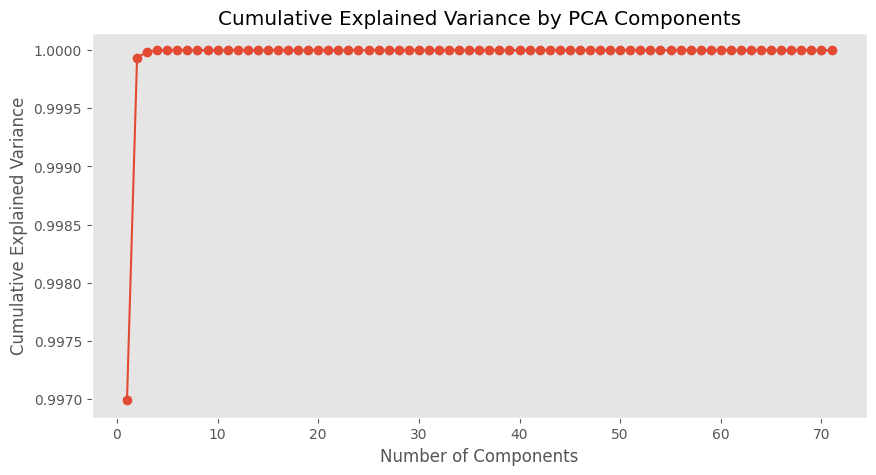

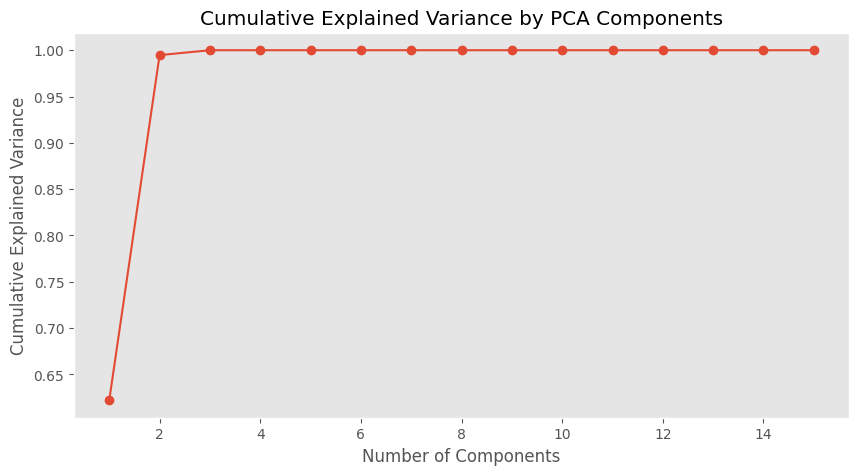

In [26]:
#do pca for the environment variables and show the variance explained by each component
pca = PCA()
pca.fit(df_full[env_var_list].dropna())
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()



pca_hotels = PCA()
pca_hotels.fit(df_full[only_hotel_var_list].dropna())
explained_variance = pca_hotels.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()


In [27]:
num_pcs = 6
num_pcs_hotel = 3

pca_components_env = pca.fit_transform(df_full[env_var_list].dropna())
df_pca_env = pd.DataFrame(data = pca_components_env[:, :num_pcs], 
						  columns = [f'PC{i+1}_env' for i in range(num_pcs)])

pca_components_hotel = pca_hotels.fit_transform(df_full[only_hotel_var_list].dropna())
df_pca_hotel = pd.DataFrame(data = pca_components_hotel[:, :num_pcs_hotel], 
							columns = [f'PC{i+1}_hotel' for i in range(num_pcs_hotel)])
df_full_reset = df_full.reset_index(drop=True)
df_full_dropped = df_full_reset.drop(columns=env_var_list + only_hotel_var_list)

df_pca = pd.concat([df_full_dropped, df_pca_env, df_pca_hotel], axis=1)
df_pca = df_pca.drop(columns=['Name', 'Location', 'Url link'])
df_pca = df_pca.dropna()
display(df_pca.shape, df_pca.describe())

(36184, 11)

Region Number  Continent Number       PC1_env       PC2_env  \
count   36184.000000      36184.000000  3.618400e+04  3.618400e+04   
mean       72.538083         94.700337 -4.048319e-08 -1.475950e-09   
std        62.834859         65.887705  4.467956e+08  2.429488e+07   
min        13.000000          2.000000 -1.989640e+08 -1.872312e+07   
25%        21.000000         19.000000 -1.912886e+08 -1.557861e+07   
50%        30.000000        142.000000 -1.635518e+08 -7.933832e+06   
75%       151.000000        150.000000 -1.325222e+08  7.391847e+06   
max       151.000000        150.000000  1.228424e+09  9.808019e+07   

            PC3_env       PC4_env       PC5_env       PC6_env     PC1_hotel  \
count  3.618400e+04  3.618400e+04  3.618400e+04  3.618400e+04  36184.000000   
mean   3.162749e-10  6.391389e-10  4.118163e-11  3.551916e-12    -78.777022   
std    3.082484e+06  1.753680e+06  2.288054e+05  7.048667e+03   3770.167827   
min   -3.860419e+06 -4.318753e+06 -3.615763e+05 -1.650224e+04  -7037.229035   
25%   -1.024870e+06 -4.459689e+05 -8.342506e+04 -3.618310e+03  -3511.270953   
50%   -9.527581e+05  3.291117e+05 -2.728726e+04 -3.940227e+02     28.099303   
75%   -6.203788e+05  4.360532e+05  7.555840e+04  3.353528e+03   3448.424148   
max    1.421021e+07  5.592252e+06  1.611139e+06  1.970013e+04   7871.074707   

          PC2_hotel     PC3_hotel  
count  36184.000000  36184.000000  
mean    -455.064489    -41.540706  
std     2599.834420    296.581573  
min    -2791.655596   -264.996787  
25%    -1880.469514   -161.428364  
50%    -1204.130702   -103.516618  
75%       41.097787     -0.312933  
max    25725.868999  13384.910247

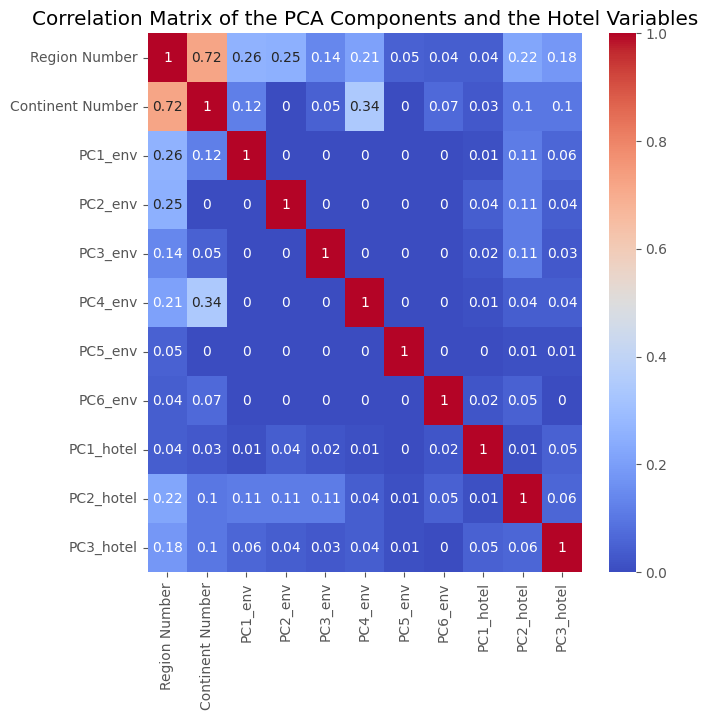

In [28]:
corr_matrix = df_pca.corr().abs().round(2)
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the PCA Components and the Hotel Variables')
plt.show()

### PCA 

# 3. Model

## 3.1 Predict region from hotel data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


numerical_features = ['Distance from center', 'Score', 'Stars', 'Facilities_rating', 'Cleanliness_rating', 'Comfort_rating', 'Value_for_money_rating', 'Staff_rating', 'Location_rating', 'Guests nb', 'Price']
#categorical_features = ['City', 'Country', 'Region', 'Continent'] 
features = numerical_features
target = 'Region'

df = pd.merge(df_hotels, df_cities, on='City', how='left')
df = pd.merge(df, df_countries, on='Country', how='left')
df = pd.merge(df, df_hotel_rooms, on='Url link', how='left')
other_cols = [col for col in df.columns if col not in ['Url link', 'Price', 'Guests nb']]
agg_dict = {col: 'first' for col in other_cols}
agg_dict.update({'Price': 'mean', 'Guests nb': 'min'})
df = df.groupby('Url link').agg(agg_dict).reset_index()
for col in df.columns:
	if col.endswith('_y'):
		df = df.drop(col, axis=1)
df.columns = [col.replace('_x', '') if col.endswith('_x') else col for col in df.columns]
df = df[features + [target]]
df = df.dropna(subset= [target])

param_grid = {
    'max_depth': [5,8],
    'min_samples_split': [2, 26, 27],
    'min_samples_leaf': [4,6,8],
    'criterion': ['gini', 'entropy']
}

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
model = DecisionTreeClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 26}
Accuracy: 0.3855656697009103


In [ ]:
""" X_test_df = pd.DataFrame(X_test)
display(X_test.shape)
y_test_df = pd.DataFrame(y_test.values, columns=['True y'])
y_pred_df = pd.DataFrame(score_from_region_predictor.predict(X_test2), columns=['Predicted y'])
results_df = pd.concat([X_test_df, y_test_df, y_pred_df], axis=1)
display(results_df.head(10).reset_index(drop=True)) """

In [ ]:
model_columns = list(set(columns_hotel)-set(columns_city)-set(['Url link', 'Location', 'Name']))
df = pd.merge(df_cities, df_hotels, on='City', how='inner')[['City']+model_columns]
display(df.head())